<a href="https://colab.research.google.com/github/wellingtonvieira001/Comunidade_SST/blob/main/Analise_Enem_Completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib as mtl
import numpy as np
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
df = files.upload()

In [9]:

df = pd.read_csv('Dataset_ENEM_2019.csv', encoding='latin-1')
df.shape

(909194, 18)

In [10]:
df.head()

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,NOTA_MEDIA,TP_ESCOLA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,TP_ENSINO,TREINEIRO,UF_ESC,ESTUDO_PAI,ESTUDO_MAE,PESSOAS_RESIDENCIA,RENDA_MENSAL
0,574.2,538.7,582.6,571.5,640.0,566.750,Privada,18,F,1,1,1.0,0,PA,H,E,3,C
1,369.7,398.2,395.6,473.8,480.0,409.325,Pública,26,F,0,3,1.0,0,PA,B,B,4,B
2,423.0,372.8,488.7,516.5,540.0,450.250,Pública,17,F,1,3,1.0,0,PA,E,E,9,C
3,412.5,417.2,485.1,446.2,580.0,440.250,Pública,18,F,1,3,1.0,0,PA,E,E,3,C
4,460.7,570.5,541.8,631.3,640.0,551.075,Pública,17,M,1,3,1.0,0,PA,D,B,3,A


In [11]:
df['UF_ESC'].unique()


array(['PA', 'AM', 'SC', 'GO', 'CE', 'ES', 'TO', 'RO', 'AC', 'SP', 'RR',
       'BA', 'PR', 'DF', 'MA', 'MT', 'MG', 'PI', 'RN', 'PE', 'PB', 'AP',
       'RJ', 'SE', 'AL', 'RS', 'MS'], dtype=object)

In [12]:
# prompt: select distinct and count the collum UF_ESC

df['UF_ESC'].value_counts().to_frame().reset_index().rename(columns={'index':'ESTADOS', 'UF_ESC':'COUNT'})


,ESTADOS,COUNT
0,SP,171429
1,MG,87197
2,CE,85682
3,RJ,58655
4,BA,56124
5,PE,48962
6,PR,41268
7,PA,37658
8,RS,37039
9,MA,34933


In [13]:
df[df['TREINEIRO'] != 0.0]

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,NOTA_MEDIA,TP_ESCOLA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,TP_ENSINO,TREINEIRO,UF_ESC,ESTUDO_PAI,ESTUDO_MAE,PESSOAS_RESIDENCIA,RENDA_MENSAL


In [14]:
df['NOTA_MEDIA'].mean()

507.8007841285798

In [15]:
df['TP_ESCOLA'].unique()

array(['Privada', 'Pública'], dtype=object)

In [16]:
df['TP_ESCOLA'].isnull().sum()

0

In [17]:
df[df['TP_ESCOLA'].isnull()]

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,NOTA_MEDIA,TP_ESCOLA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,TP_ENSINO,TREINEIRO,UF_ESC,ESTUDO_PAI,ESTUDO_MAE,PESSOAS_RESIDENCIA,RENDA_MENSAL


In [18]:
df.isnull().sum()

NOTA_CN               0
NOTA_CH               0
NOTA_LC               0
NOTA_MT               0
NOTA_REDACAO          0
NOTA_MEDIA            0
TP_ESCOLA             0
IDADE                 0
SEXO                  0
ESTADO_CIVIL          0
COR_RACA              0
TP_ENSINO             0
TREINEIRO             0
UF_ESC                0
ESTUDO_PAI            0
ESTUDO_MAE            0
PESSOAS_RESIDENCIA    0
RENDA_MENSAL          0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
contagem =  df['COR_RACA'].unique()
contagem

array([1, 3, 2, 4, 0, 5])

In [21]:
moda = df['COR_RACA'].mode()
moda

0    3
Name: COR_RACA, dtype: int64

In [22]:
df.describe()

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,NOTA_MEDIA,IDADE,ESTADO_CIVIL,COR_RACA,TP_ENSINO,TREINEIRO,PESSOAS_RESIDENCIA
count,909194.000000,909194.000000,909194.000000,909194.000000,909194.000000,909194.000000,909194.000000,909194.000000,909194.000000,909194.000000,909194.0,909194.00000
mean,475.507799,507.890131,520.570820,527.234387,589.151644,507.800784,17.739126,0.993503,2.084587,1.002577,0.0,4.07502
std,75.580726,80.171623,63.489424,108.960311,188.870879,71.051387,1.512292,0.236926,1.027948,0.050699,0.0,1.34743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.0,1.00000
25%,415.200000,449.200000,483.300000,439.700000,500.000000,452.600000,17.000000,1.000000,1.000000,1.000000,0.0,3.00000
50%,467.700000,511.500000,526.500000,505.900000,600.000000,498.025000,18.000000,1.000000,2.000000,1.000000,0.0,4.00000
75%,531.600000,566.300000,565.500000,601.800000,700.000000,556.125000,18.000000,1.000000,3.000000,1.000000,0.0,5.00000
max,853.500000,835.100000,801.700000,985.500000,1000.000000,818.525000,70.000000,4.000000,5.000000,2.000000,0.0,20.00000


In [23]:
media = df['IDADE'].mean()
media


17.739126083102175

In [24]:
maxima = df['IDADE'].max()
maxima

70

In [25]:
minima = df['IDADE'].min()
minima

2

In [26]:
df[df['IDADE'] <13]

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,NOTA_MEDIA,TP_ESCOLA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,TP_ENSINO,TREINEIRO,UF_ESC,ESTUDO_PAI,ESTUDO_MAE,PESSOAS_RESIDENCIA,RENDA_MENSAL
35798,397.1,408.4,481.4,527.7,560.0,453.650,Pública,7,M,1,3,1.0,0,CE,B,C,3,B
42640,358.3,418.3,435.6,526.4,480.0,434.650,Pública,7,M,1,3,1.0,0,MA,C,E,7,B
135869,394.5,492.1,508.5,560.4,660.0,488.875,Pública,3,F,1,0,1.0,0,CE,C,C,5,B
164008,442.6,469.8,549.9,467.9,600.0,482.550,Pública,7,F,1,1,1.0,0,MT,F,E,4,I
172278,533.9,517.8,540.6,457.0,720.0,512.325,Pública,8,M,1,5,1.0,0,SP,E,E,3,F
216507,369.6,434.0,470.3,429.6,500.0,425.875,Pública,8,M,1,0,1.0,0,CE,B,B,5,B
220307,448.2,530.8,548.8,548.6,580.0,519.100,Pública,8,F,1,4,1.0,0,CE,G,E,5,C
230074,415.0,485.8,545.5,410.0,500.0,464.075,Pública,3,F,1,3,1.0,0,AM,C,D,5,B
260931,352.3,384.7,403.1,404.9,500.0,386.250,Pública,12,M,1,3,1.0,0,MG,C,E,4,B
279703,434.1,579.1,515.0,500.6,900.0,507.200,Pública,2,F,1,1,1.0,0,PB,B,F,7,F


In [27]:
# prompt: remova as linas onde a coluna df['IDADE'] <13

df = df[df['IDADE'] >= 13]


In [28]:
df[df['IDADE'] <13]

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,NOTA_MEDIA,TP_ESCOLA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,TP_ENSINO,TREINEIRO,UF_ESC,ESTUDO_PAI,ESTUDO_MAE,PESSOAS_RESIDENCIA,RENDA_MENSAL


In [29]:
df['ESTUDO_PAI'].unique()

array(['H', 'B', 'E', 'D', 'C', 'G', 'F', 'A'], dtype=object)

In [30]:
df['SEXO'].unique()

array(['F', 'M'], dtype=object)

<Axes: xlabel='SEXO'>

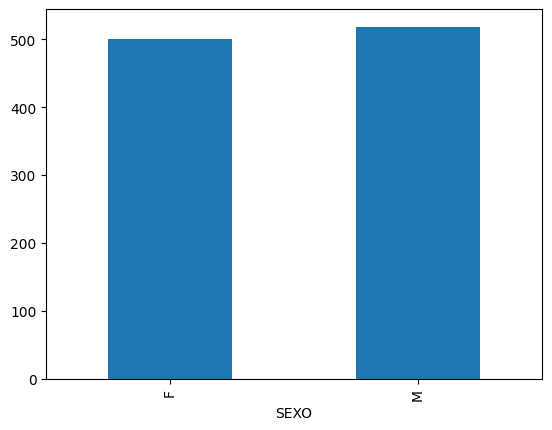

In [31]:
# prompt: PLOT GRAFICO DA COLUNA NOTA_MEDIA E COLUNA SEXO

df.groupby('SEXO')['NOTA_MEDIA'].mean().plot(kind='bar')


<Axes: xlabel='TP_ESCOLA'>

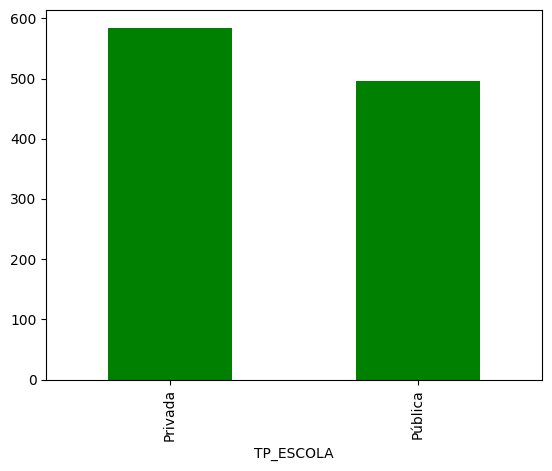

In [32]:
# prompt: GERE UM GRÁFICO COM A COLUNA TP_ESCOLA E NOTA_MEDIA, MUDE A COR DO GRAFICO PARA VERDE

df.groupby('TP_ESCOLA')['NOTA_MEDIA'].mean().plot(kind='bar', color='green')


<Axes: xlabel='COR_RACA'>

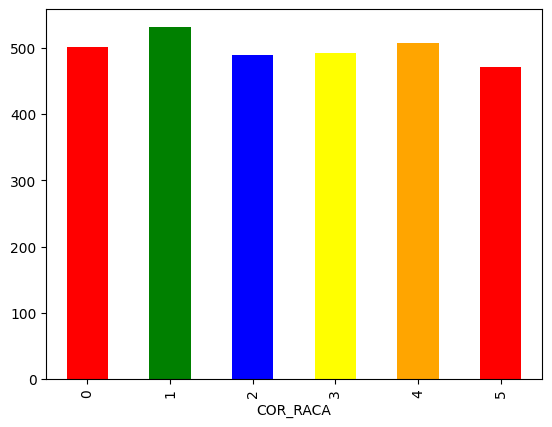

In [33]:
# prompt: GERE UM GRAFICO COM AS COLUNAS NOTA_MEDIA E COR_RACA E COLOQUE CORES DIOFERENTES PARA AS COLUNAS

df.groupby('COR_RACA')['NOTA_MEDIA'].mean().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'orange'])


<Axes: xlabel='UF_ESC'>

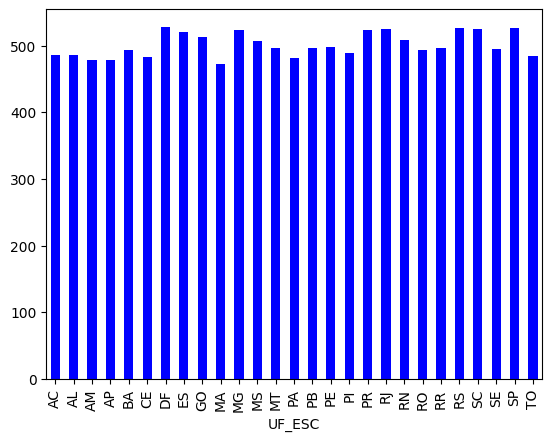

In [34]:
# prompt: GERE UM GRAFICO COM AS COLUNAS  UF_ESC E COLUNA NOTA_MEDIA

df.groupby('UF_ESC')['NOTA_MEDIA'].mean().plot(kind='bar', color='blue')


<Axes: xlabel='UF_ESC'>

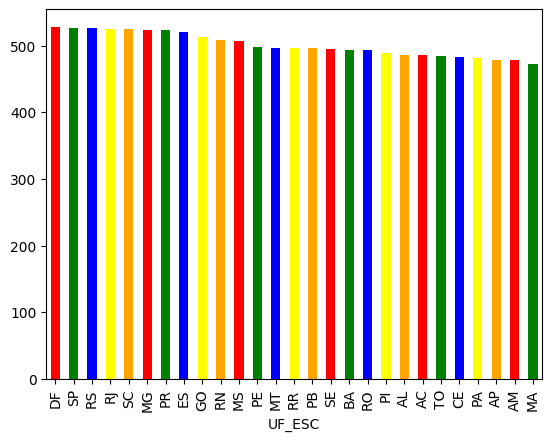

In [37]:
# prompt: MODIFIQUE O CODIGO PARA EXIBIR ORDEM DECRESCENTE E CORES DIFERESNTES PARA CADA COLUNA: df.groupby('UF_ESC')['NOTA_MEDIA'].mean().plot(kind='bar', color='blue')

df.groupby('UF_ESC')['NOTA_MEDIA'].mean().sort_values(ascending=False).plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'orange'])


<Axes: xlabel='COR_RACA'>

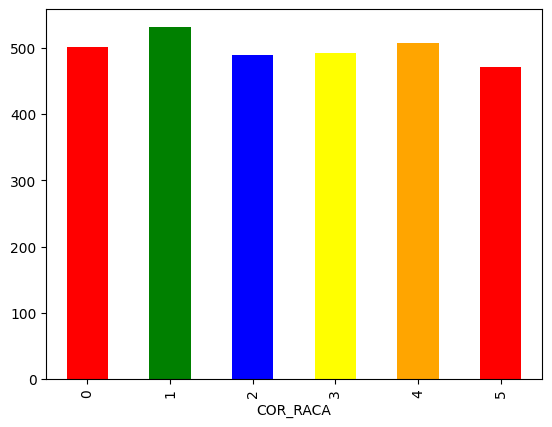

In [35]:
# prompt: CREI UM GRAFICO COM AS COLUNAS COR_RACA E NOTA_MEDIA

df.groupby('COR_RACA')['NOTA_MEDIA'].mean().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'orange'])
